<a href="https://colab.research.google.com/github/rikachan19/JaringanSarafTiruan/blob/main/tugas3/tugasjst4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import library yang diperlukan
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset Iris
iris = load_iris()

X = iris['data']  # Fitur: sepal length, sepal width, petal length, petal width
y = iris['target'].reshape(-1, 1)  # Target: Kelas (Setosa, Versicolor, Virginica)

# 3. Preprocessing data
# One hot encoding untuk target (karena kita punya 3 kelas)

encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False untuk sklearn versi terbaru

y_encoded = encoder.fit_transform(y)

In [2]:
# Pisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Tampilkan beberapa data pelatihan
data_latih = pd.DataFrame(X_train, columns=iris['feature_names'])
data_latih['target'] = np.argmax(y_train, axis=1)  # Tambahkan kolom target
data_latih['nama_target'] = data_latih['target'].apply(lambda x: iris['target_names'][x])  # Tambahkan kolom nama target
print("Data Pelatihan:")
print(data_latih.head())  # Tampilkan 5 data pertama

# Tampilkan beberapa data pengujian
data_uji = pd.DataFrame(X_test, columns=iris['feature_names'])
data_uji['target'] = np.argmax(y_test, axis=1)  # Tambahkan kolom target
data_uji['nama_target'] = data_uji['target'].apply(lambda x: iris['target_names'][x])  # Tambahkan kolom nama target
print("\nData Pengujian:")
print(data_uji.head())  # Tampilkan 5 data pertama

Data Pelatihan:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                4.6               3.6                1.0               0.2   
1                5.7               4.4                1.5               0.4   
2                6.7               3.1                4.4               1.4   
3                4.8               3.4                1.6               0.2   
4                4.4               3.2                1.3               0.2   

   target nama_target  
0       0      setosa  
1       0      setosa  
2       1  versicolor  
3       0      setosa  
4       0      setosa  

Data Pengujian:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.1               2.8                4.7               1.2   
1                5.7               3.8                1.7               0.3   
2                7.7               2.6                6.9               2.3   
3                6.0            

In [3]:

# 4. Membangun jaringan saraf sederhana (1 lapisan tersembunyi)
input_neuron = X_train.shape[1]  # 4 fitur (lapisan input)
hidden_neuron = 5  # 5 neuron di lapisan tersembunyi
output_neuron = y_train.shape[1]  # 3 output (kelas bunga)

# Inisialisasi bobot secara acak
np.random.seed(42)

W1 = np.random.randn(input_neuron, hidden_neuron)  # Bobot untuk lapisan input ke lapisan tersembunyi
b1 = np.zeros((1, hidden_neuron))  # Bias untuk lapisan tersembunyi

W2 = np.random.randn(hidden_neuron, output_neuron)  # Bobot untuk lapisan tersembunyi ke lapisan output
b2 = np.zeros((1, output_neuron))  # Bias untuk lapisan output

# Fungsi aktivasi: Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # Fungsi Sigmoid

def sigmoid_derivative(x):
    return x * (1 - x)  # Turunan fungsi Sigmoid

In [4]:
# 5. Propagasi Maju (Forward Propagation)
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1  # Perhitungan untuk lapisan tersembunyi
    A1 = sigmoid(Z1)         # Aktivasi lapisan tersembunyi menggunakan fungsi sigmoid
    Z2 = np.dot(A1, W2) + b2  # Perhitungan untuk lapisan output
    A2 = sigmoid(Z2)         # Aktivasi lapisan output menggunakan fungsi sigmoid
    return Z1, A1, Z2, A2     # Mengembalikan nilai-nilai untuk backpropagation

# 6. Propagasi Balik (Pembaruan Bobot)
def backward_propagation(X, Y, Z1, A1, Z2, A2, learning_rate):
    global W1, b1, W2, b2  # Deklarasi variabel global sebelum digunakan

    # Kesalahan di lapisan output
    dZ2 = A2 - Y  # Selisih antara prediksi (A2) dan nilai sebenarnya (Y)
    dW2 = np.dot(A1.T, dZ2) / len(X)  # Gradien bobot untuk W2
    db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X)  # Gradien bias untuk b2

    # Kesalahan di lapisan tersembunyi
    dA1 = np.dot(dZ2, W2.T)  # Kesalahan yang dibawa kembali dari output ke lapisan tersembunyi
    dZ1 = dA1 * sigmoid_derivative(A1)  # Turunan sigmoid untuk menghitung kesalahan di Z1
    dW1 = np.dot(X.T, dZ1) / len(X)  # Gradien bobot untuk W1
    db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X)  # Gradien bias untuk b1

    # Pembaruan bobot
    W1 -= learning_rate * dW1  # Update bobot W1
    b1 -= learning_rate * db1  # Update bias b1
    W2 -= learning_rate * dW2  # Update bobot W2
    b2 -= learning_rate * db2  # Update bias b2

In [5]:

# 7. Training (pelatihan)
def train(X, y, iterations, learning_rate):
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(X)
        backward_propagation(X, y, Z1, A1, Z2, A2, learning_rate)

        # Cetak loss (Mean Squared Error) setiap iterasi
        loss = np.mean(np.square(y - A2))
        print(f'Iteration {i+1}, Loss: {loss}')

# Melatih jaringan (10 iterasi, learning rate 0.01)
train(X_train, y_train, iterations=10, learning_rate=0.01)

# 8. Testing (pengujian)
def predict(X):
    A2 = forward_propagation(X)[-1]
    return np.argmax(A2, axis=1)

# Memprediksi kelas untuk data uji
predictions = predict(X_test)

# Evaluasi akurasi
y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predictions)
print(f'Akurasi: {accuracy:.2f}%')

Iteration 1, Loss: 0.30105161691576526
Iteration 2, Loss: 0.3000385084976714
Iteration 3, Loss: 0.2990315625126517
Iteration 4, Loss: 0.2980306211088376
Iteration 5, Loss: 0.2970355402462242
Iteration 6, Loss: 0.29604619207544774
Iteration 7, Loss: 0.2950624667069096
Iteration 8, Loss: 0.29408427340560883
Iteration 9, Loss: 0.29311154124975036
Iteration 10, Loss: 0.29214421929350853
Akurasi: 0.23%


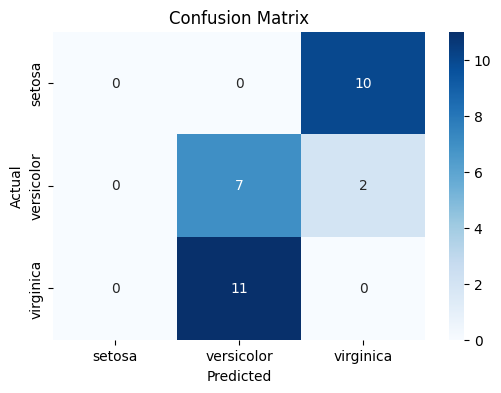

In [6]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris['target_names'], yticklabels=iris['target_names'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 9. Fungsi untuk memprediksi data baru
def predict_new_data(new_data):
    new_data = np.array(new_data).reshape(1, -1)  # Convert to 2D array
    predicted_class = predict(new_data)  # Predict class
    class_names = iris['target_names']  # Class names (Setosa, Versicolor, Virginica)
    return class_names[predicted_class][0]

In [7]:


# Contoh prediksi data baru
new_data = [5.1, 3.5, 1.4, 0.2]  # New data (sepal length, sepal width, petal length, petal width)
predicted_class = predict_new_data(new_data)

print(f'Data baru: {new_data}, Prediksi Kelas: {predicted_class}')

Data baru: [5.1, 3.5, 1.4, 0.2], Prediksi Kelas: virginica
